In [6]:
import pandas as pd
# Re-load all three datasets after kernel reset
books_df = pd.read_csv("data/Books.csv", encoding='latin-1', on_bad_lines='skip')
ratings_df = pd.read_csv("data/Ratings.csv", encoding='latin-1', on_bad_lines='skip')
users_df = pd.read_csv("data/Users.csv", encoding='latin-1', on_bad_lines='skip')

# Convert book year to numeric for analysis
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\162023276.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("data/Books.csv", encoding='latin-1', on_bad_lines='skip')


In [7]:

# Basic summary statistics for each dataset
books_summary = books_df.describe(include='all')
ratings_summary = ratings_df.describe(include='all')
users_summary = users_df.describe(include='all')

# Null counts
books_nulls = books_df.isnull().sum()
ratings_nulls = ratings_df.isnull().sum()
users_nulls = users_df.isnull().sum()

# Sample unique counts
books_uniques = books_df.nunique()
ratings_uniques = ratings_df.nunique()
users_uniques = users_df.nunique()

print(
    f"Books Nulls:\n{books_nulls}\n\n"
    f"Ratings Nulls:\n{ratings_nulls}\n\n"
    f"Users Nulls:\n{users_nulls}\n\n"
    f"Books Unique Counts:\n{books_uniques}\n\n"
    f"Ratings Unique Counts:\n{ratings_uniques}\n\n"
    f"Users Unique Counts:\n{users_df.nunique()}"
)


Books Nulls:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    3
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Ratings Nulls:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Users Nulls:
User-ID          0
Location         0
Age         110762
dtype: int64

Books Unique Counts:
ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       116
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

Ratings Unique Counts:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

Users Unique Counts:
User-ID     278858
Location     57339
Age            165
dtype: int64


C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\2573480039.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("data/Books.csv", encoding='latin-1')


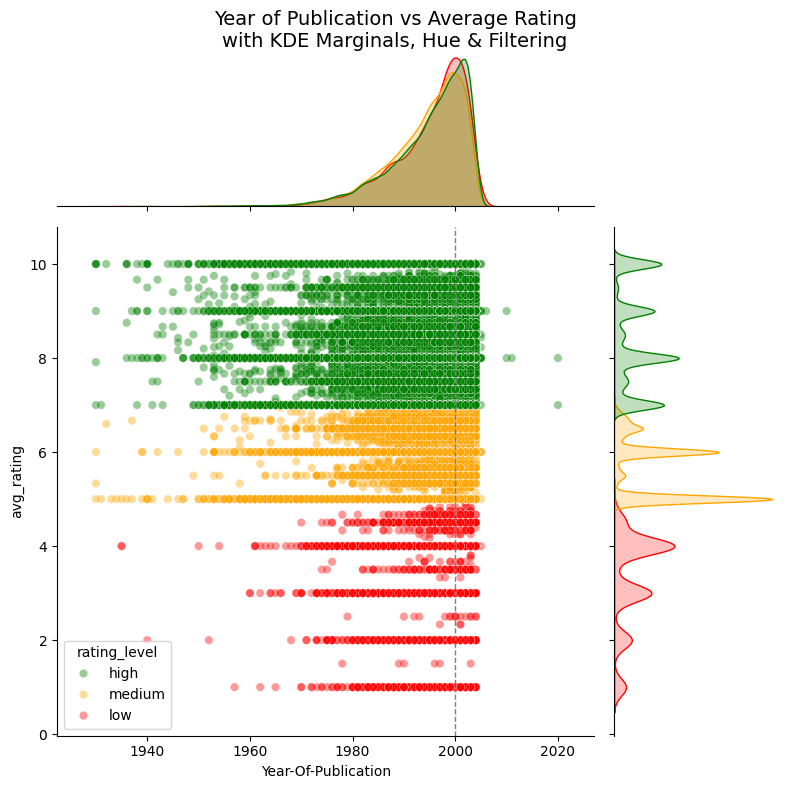

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets from data/ folder
books_df = pd.read_csv("data/Books.csv", encoding='latin-1')
ratings_df = pd.read_csv("data/Ratings.csv", encoding='latin-1')

# Clean and merge
ratings_df = ratings_df[ratings_df['Book-Rating'] > 0]
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
merged = ratings_df.merge(books_df[['ISBN', 'Year-Of-Publication']], on='ISBN', how='left')
merged = merged[(merged['Year-Of-Publication'] >= 1900) & (merged['Year-Of-Publication'] <= 2025)]

# Compute average rating per book
avg_rating = merged.groupby('ISBN')['Book-Rating'].mean().reset_index(name='avg_rating')
year_rating = books_df[['ISBN', 'Year-Of-Publication']].merge(avg_rating, on='ISBN')
year_rating = year_rating.dropna(subset=['Year-Of-Publication', 'avg_rating'])

# Remove outlier years (optional but recommended for clarity)
year_rating = year_rating[
    (year_rating['Year-Of-Publication'] >= 1930) & 
    (year_rating['Year-Of-Publication'] <= 2020)
]

# Categorize rating levels using custom bins or quantiles
def categorize_rating(r):
    if r < 5:
        return 'low'
    elif r < 7:
        return 'medium'
    else:
        return 'high'

year_rating['rating_level'] = year_rating['avg_rating'].apply(categorize_rating)

# Define custom color palette
palette = {'low': 'red', 'medium': 'orange', 'high': 'green'}

# Create the enhanced jointplot
plot = sns.jointplot(
    data=year_rating,
    x='Year-Of-Publication',
    y='avg_rating',
    hue='rating_level',
    kind='scatter',
    palette=palette,
    height=8,
    ratio=3,
    marginal_kws=dict(common_norm=False),
    joint_kws=dict(alpha=0.4, edgecolor="w", linewidth=0.3)
)

# Add vertical reference line (e.g., year 2000)
plot.ax_joint.axvline(x=2000, color='gray', linestyle='--', linewidth=1)

# Set the title
plot.fig.suptitle("Year of Publication vs Average Rating\nwith KDE Marginals, Hue & Filtering", fontsize=14)
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.93)  # Adjust title spacing

plt.show()


C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\1200964469.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


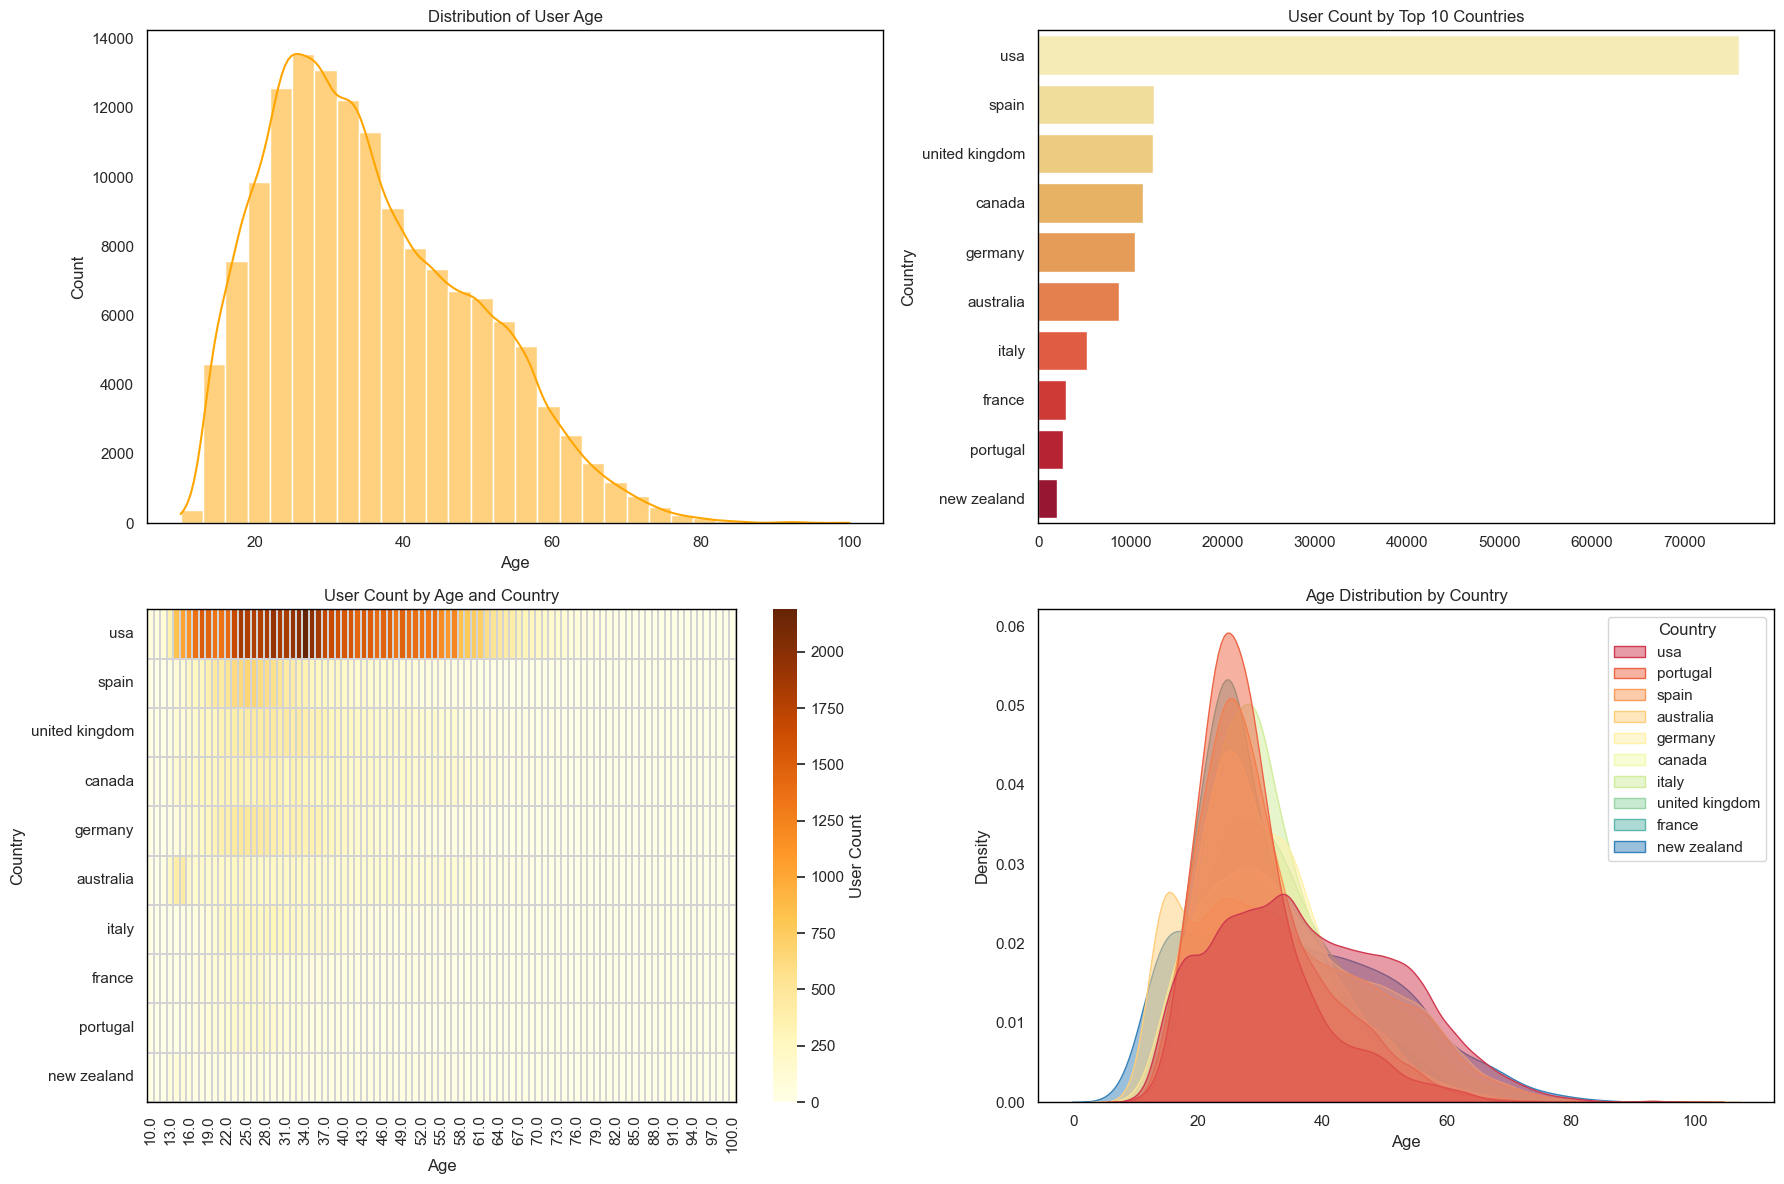

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean Users dataset
users_df = pd.read_csv("data/Users.csv", encoding='latin-1')
users_df['Age'] = pd.to_numeric(users_df['Age'], errors='coerce')
users_df = users_df[(users_df['Age'] >= 10) & (users_df['Age'] <= 100)]
users_df['Country'] = users_df['Location'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else 'Unknown')

# Top 10 countries
top_countries = users_df['Country'].value_counts().head(10).index.tolist()
filtered_users = users_df[users_df['Country'].isin(top_countries)]

# Heatmap data: count of users by (Country, Age)
heatmap_data = (
    filtered_users.groupby(['Country', 'Age'])
    .size()
    .unstack(fill_value=0)
    .loc[top_countries]
)

# Setup plotting
sns.set(style="white", rc={"axes.edgecolor": "black", "axes.linewidth": 1.2})
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.patch.set_facecolor('white')

# Plot 1: Age Distribution
sns.histplot(
    filtered_users['Age'],
    bins=30,
    kde=True,
    ax=axes[0, 0],
    color='orange'
)
axes[0, 0].set_title("Distribution of User Age")
axes[0, 0].grid(False)

# Plot 2: Country Count
country_counts = filtered_users['Country'].value_counts().loc[top_countries]
sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    ax=axes[0, 1],
    palette="YlOrRd"
)
axes[0, 1].set_title("User Count by Top 10 Countries")
axes[0, 1].grid(False)

# Plot 3: Heatmap of Age × Country
sns.heatmap(
    heatmap_data,
    cmap="YlOrBr",
    ax=axes[1, 0],
    cbar_kws={"label": "User Count"},
    linewidths=0.05,
    linecolor='lightgray'
)
axes[1, 0].set_title("User Count by Age and Country")

# Plot 4: Age KDE by Country
sns.kdeplot(
    data=filtered_users,
    x="Age",
    hue="Country",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=axes[1, 1],
    palette="Spectral"
)
axes[1, 1].set_title("Age Distribution by Country")
axes[1, 1].grid(False)

# Add black borders to each plot
for ax in axes.flat:
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("black")
        spine.set_linewidth(1)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from openai import OpenAI
import chromadb
from chromadb.config import Settings
from tqdm import tqdm
import time

# Set your API key
OPENAI_API_KEY = ''
# Load the book dataset
books_df = pd.read_csv("data/Books.csv", encoding="latin-1")
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']].dropna().drop_duplicates().head(10)
books_df.columns = ['ISBN', 'Book_Title', 'Book_Author']

# Prepare ChromaDB
chroma_client = chromadb.Client(Settings(
    persist_directory="chroma_books",  # folder to save the DB
    anonymized_telemetry=False
))
collection = chroma_client.get_or_create_collection(name="book_metadata")

# Function to query OpenAI for structured metadata
def generate_book_metadata(title, author):
    try:
        response = client.responses.create(
            model="gpt-4.1-nano-2025-04-14",
            instructions = (
                "For each book below, generate a JSON object with keys: 'title', 'genre', 'theme', 'tone'. "
                "The entire response must be a single valid JSON list containing these objects."
            ),
            input=f"Book title: {title}\nAuthor: {author}"
        )
        text = response.output_text
        return text
    except Exception as e:
        return f"Error: {str(e)}"

# Loop through books and generate metadata
results = []
for i, row in tqdm(books_df.iterrows(), total=len(books_df)):
    isbn = row['ISBN']
    title = row['Book_Title']
    author = row['Book_Author']
    
    metadata = generate_book_metadata(title, author)
    results.append({
        "ISBN": isbn,
        "Book-Title": title,
        "Book-Author": author,
        "Generated_Metadata": metadata
    })
    
    # Add to Chroma
    collection.add(
        documents=[f"{title} by {author}. {metadata}"],
        metadatas=[{"ISBN": isbn}],
        ids=[isbn]
    )
    
    time.sleep(1)  # Avoid rate limits

# Save to new CSV
results_df = pd.DataFrame(results)
results_df.to_csv("Enriched_Books_Metadata.csv", index=False)
print("✅ Enriched data saved to 'Enriched_Books_Metadata.csv' and stored in ChromaDB.")




C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\3135776012.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("data/Books.csv", encoding="latin-1")
  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\3135776012.py:45: RuntimeWarning: coroutine 'AsyncResponses.create' was never awaited
  metadata = generate_book_metadata(title, author)
100%|██████████| 10/10 [00:12<00:00,  1.24s/it]

✅ Enriched data saved to 'Enriched_Books_Metadata.csv' and stored in ChromaDB.


In [11]:
results

[{'ISBN': '0195153448',
  'Book-Title': 'Classical Mythology',
  'Book-Author': 'Mark P. O. Morford',
  'Generated_Metadata': "Error: 'coroutine' object has no attribute 'output_text'"},
 {'ISBN': '0002005018',
  'Book-Title': 'Clara Callan',
  'Book-Author': 'Richard Bruce Wright',
  'Generated_Metadata': "Error: 'coroutine' object has no attribute 'output_text'"},
 {'ISBN': '0060973129',
  'Book-Title': 'Decision in Normandy',
  'Book-Author': "Carlo D'Este",
  'Generated_Metadata': "Error: 'coroutine' object has no attribute 'output_text'"},
 {'ISBN': '0374157065',
  'Book-Title': 'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
  'Book-Author': 'Gina Bari Kolata',
  'Generated_Metadata': "Error: 'coroutine' object has no attribute 'output_text'"},
 {'ISBN': '0393045218',
  'Book-Title': 'The Mummies of Urumchi',
  'Book-Author': 'E. J. W. Barber',
  'Generated_Metadata': "Error: 'coroutine' object has no attribute 'output_text'"}

In [ ]:
import pandas as pd
from openai import OpenAI
import chromadb
from chromadb.config import Settings
from tqdm import tqdm
import time
import json
# Set your API key
OPENAI_API_KEY = ''
# Initialize the OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

# Load the book dataset
books_df = pd.read_csv("data/Books.csv", encoding="latin-1")
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']].dropna().drop_duplicates()
books_df.columns = ['ISBN', 'Book_Title', 'Book_Author']

# Prepare ChromaDB
chroma_client = chromadb.Client(Settings(
    persist_directory="chroma_books",  # folder to save the DB
    anonymized_telemetry=False
))
collection = chroma_client.get_or_create_collection(name="book_metadata")

# Function to query OpenAI for structured metadata
def generate_book_metadata(title, author):
    try:
        response = client.responses.create(
            model="gpt-4.1-nano-2025-04-14",
            instructions=(
                "For the book provided below, generate a JSON object with the following keys: 'title', 'genre', 'theme', 'tone'. "
                "The entire response must be a single valid JSON object containing these keys."
            ),
            input=f"Book title: {title}\nAuthor: {author}"
        )
        
        # Parse the response to extract the individual attributes
        text = response.output_text
        parsed_metadata = json.loads(text)
        
        # Return the individual fields
        return parsed_metadata.get('title', ''), parsed_metadata.get('genre', ''), parsed_metadata.get('theme', ''), parsed_metadata.get('tone', '')
    
    except Exception as e:
        return '', '', '', f"Error: {str(e)}"

# Loop through books and generate metadata
results = []
for i, row in tqdm(books_df.iterrows(), total=len(books_df)):
    isbn = row['ISBN']
    title = row['Book_Title']
    author = row['Book_Author']
    
    # Get metadata from OpenAI
    title_metadata, genre, theme, tone = generate_book_metadata(title, author)
    
    # Append the result to the list
    results.append({
        "ISBN": isbn,
        "Book-Title": title,
        "Book-Author": author,
        "Title": title_metadata,
        "Genre": genre,
        "Theme": theme,
        "Tone": tone
    })
    
    # Add to Chroma, ensuring no None values
    collection.add(
        documents=[f"{title} by {author}. {title_metadata}, {genre}, {theme}, {tone}"],
        metadatas=[{
            "ISBN": isbn,
            "title": title_metadata or '',  # Ensure no None values
            "genre": genre or '',
            "theme": theme or '',
            "tone": tone or ''
        }],
        ids=[isbn]
    )
    

# Save to new CSV
results_df = pd.DataFrame(results)
results_df.to_csv("Enriched_Books_Metadata.csv", index=False)
print("✅ Enriched data saved to 'Enriched_Books_Metadata.csv' and stored in ChromaDB.")


C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_24484\4145684442.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("data/Books.csv", encoding="latin-1")
  0%|          | 11/271358 [00:17<107:49:23,  1.43s/it]

In [ ]:
import pandas as pd
from openai import OpenAI
import chromadb
from chromadb.config import Settings
from tqdm import tqdm
import time
import json
# Set your API key
OPENAI_API_KEY = ''
# Initialize the OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

# Load the book dataset
books_df = pd.read_csv("data/Books.csv", encoding="latin-1")
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']].dropna().drop_duplicates()
books_df.columns = ['ISBN', 'Book_Title', 'Book_Author']
# Prepare ChromaDB
chroma_client = chromadb.Client(Settings(
    persist_directory="chroma_books",  # folder to save the DB
    anonymized_telemetry=False
))
collection = chroma_client.get_or_create_collection(name="book_metadata")

# Function to query OpenAI for structured metadata (Batch processing version)
def generate_book_metadata_batch(book_batch):
    try:
        # Create the input for the batch of books
        input_text = "\n".join([f"Book title: {book['Book_Title']}\nAuthor: {book['Book_Author']}" for book in book_batch])
        
        # Send the request in a batch
        response = client.responses.create(
            model="gpt-4.1-nano-2025-04-14",
            instructions=(
                "For each book below, generate a JSON object with the following keys: 'title', 'genre', 'theme', 'tone'. "
                "The entire response must be a single valid JSON list containing these objects."
            ),
            input=input_text
        )
        
        # Parse the response
        text = response.output_text
        parsed_metadata = json.loads(text)
        
        return parsed_metadata
    
    except Exception as e:
        return [{"title": '', "genre": '', "theme": '', "tone": f"Error: {str(e)}"} for _ in book_batch]

# Batch size for processing
batch_size = 100

# Loop through books and generate metadata in batches
results = []
for start_idx in tqdm(range(0, len(books_df), batch_size), total=len(books_df)//batch_size):
    # Get the current batch of books
    batch = books_df.iloc[start_idx:start_idx + batch_size]
    
    # Get metadata for the batch
    metadata_batch = generate_book_metadata_batch(batch.to_dict(orient='records'))
    
    # Process the metadata and append results
    for i, row in batch.iterrows():
        isbn = row['ISBN']
        title = row['Book_Title']
        author = row['Book_Author']
        
        # Extract the metadata for the current book
        metadata = metadata_batch[i - start_idx]  # Ensure the correct metadata matches the book
        title_metadata = metadata.get('title', '')
        genre = metadata.get('genre', '')
        theme = metadata.get('theme', '')
        tone = metadata.get('tone', '')
        
        # Append the result to the list
        results.append({
            "ISBN": isbn,
            "Book-Title": title,
            "Book-Author": author,
            "Title": title_metadata,
            "Genre": genre,
            "Theme": theme,
            "Tone": tone
        })
        
        # Add to Chroma, ensuring no None values
        collection.add(
            documents=[f"{title} by {author}. {title_metadata}, {genre}, {theme}, {tone}"],
            metadatas=[{
                "ISBN": isbn,
                "title": title_metadata or '',  # Ensure no None values
                "genre": genre or '',
                "theme": theme or '',
                "tone": tone or ''
            }],
            ids=[isbn]
        )
    

# Save to new CSV
results_df = pd.DataFrame(results)
results_df.to_csv("Enriched_Books_Metadata.csv", index=False)
print("✅ Enriched data saved to 'Enriched_Books_Metadata.csv' and stored in ChromaDB.")

In [ ]:
import pandas as pd
from openai import AsyncOpenAI # Import the asynchronous client
import chromadb
from chromadb.config import Settings
from tqdm.asyncio import tqdm # Use the asyncio-compatible tqdm
import time
import json
import os
import asyncio
import nest_asyncio
nest_asyncio.apply()
import asyncio
import aiohttp  # for timeout exceptions

OPENAI_API_KEY = ''

# How many books to include in each API call.
API_BATCH_SIZE = 10
CONCURRENT_LIMIT = 100
MODEL_NAME = "gpt-4.1-nano-2025-04-14"

# --- Initialization ---
client = AsyncOpenAI(api_key=OPENAI_API_KEY)

# Prepare ChromaDB
chroma_client = chromadb.Client(Settings(
    persist_directory="chroma_books",
    anonymized_telemetry=False
))
collection = chroma_client.get_or_create_collection(name="books_metadata")

# --- Asynchronous function to process one batch ---
async def get_metadata_for_batch(book_batch, session_id, semaphore):
    """
    Sends a single batch of books to the OpenAI API, and re-aligns based on returned IDs.
    """
    async with semaphore:
        input_text = "\n".join([f"id: {i}, title: {book['Book_Title']}, author: {book['Book_Author']}" for i, book in enumerate(book_batch)])
        
        system_prompt = (
            "You are a helpful librarian assistant. For each book provided, generate a JSON object that includes the following fields: "
            "'summary', 'genre', 'category', 'theme', 'tone', and 'audience'. "
            "Crucially, you MUST include the original 'id' for each book in your response. "
            "Return the entire output as a single, valid JSON object with a top-level key 'data' containing a list of these book objects. "
            "Example format: {\"data\": [{\"id\": 0, \"summary\": \"...\", \"genre\": \"...\", \"category\": \"...\", \"theme\": \"...\", \"tone\": \"...\", \"audience\": \"...\"}]}"
        )

        response = await client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": input_text}
            ],
            response_format={"type": "json_object"},
            temperature=0.2,
            max_tokens=2048
        )

        content = json.loads(response.choices[0].message.content)
        parsed_metadata = content.get('data', [])

        if len(parsed_metadata) != len(book_batch):
            print(f"⚠️ Warning: Mismatch in batch {session_id}. Re-aligning data using IDs.")
            result_map = {item.get('id'): item for item in parsed_metadata if 'id' in item}
            final_results = []
            for i in range(len(book_batch)):
                if i in result_map:
                    final_results.append(result_map[i])
                else:
                    final_results.append({"genre": "Error", "theme": "Model skipped this item", "tone": ""})
            return final_results

        return parsed_metadata


# --- Retry wrapper with exponential backoff ---
async def retry_openai_call(book_batch, session_id, semaphore, max_retries=10):
    for attempt in range(1, max_retries + 1):
        try:
            return await asyncio.wait_for(
                get_metadata_for_batch(book_batch, session_id, semaphore),
                timeout=60
            )
        except asyncio.TimeoutError:
            print(f"⏰ Timeout on batch {session_id}, attempt {attempt}")
        except aiohttp.ClientError as e:
            print(f"🌐 Network error on batch {session_id}, attempt {attempt}: {e}")
        except Exception as e:
            print(f"⚠️ Unexpected error on batch {session_id}, attempt {attempt}: {e}")
        await asyncio.sleep(2 ** attempt)

    print(f"❌ Giving up on batch {session_id} after {max_retries} attempts.")
    return [{"genre": "Error", "theme": "Failed after retries", "tone": ""} for _ in book_batch]




# --- Main asynchronous logic ---
async def main():
    """
    Main function to orchestrate loading data, processing batches concurrently,
    and saving the results.
    """
    # Load data, using low_memory=False to prevent DtypeWarning on large files
    print("📚 Loading and cleaning the book dataset...")
    books_df = pd.read_csv("data/Books.csv", encoding="latin-1", low_memory=False)
    books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']].dropna().drop_duplicates().reset_index(drop=True)
    books_df.columns = ['ISBN', 'Book_Title', 'Book_Author']
    
    # books_df = books_df.head(500)

    # Create the semaphore to limit concurrent requests
    semaphore = asyncio.Semaphore(CONCURRENT_LIMIT)

    # Create small batches of books to be processed
    book_batches = [
        books_df.iloc[i:i + API_BATCH_SIZE].to_dict('records')
        for i in range(0, len(books_df), API_BATCH_SIZE)
    ]

    # Create a list of tasks, passing the semaphore to each
    tasks = [retry_openai_call(batch, i, semaphore) for i, batch in enumerate(book_batches)]


    # This list will hold all the successfully processed metadata
    all_metadata = []
    results_df = books_df.copy()

    print(f"🚀 Starting to process {len(books_df)} books in {len(tasks)} batches (max {CONCURRENT_LIMIT} running at once)...")
    
    # Use asyncio.as_completed to process tasks as they finish
    for future in tqdm(asyncio.as_completed(tasks), total=len(tasks), desc="Processing Batches"):
        metadata_result = await future
        all_metadata.extend(metadata_result)
        
    print("✅ All API batches processed.")

    # --- Combine and Save Data ---
    print("💾 Combining original data with new metadata...")
    if len(all_metadata) > len(books_df):
        all_metadata = all_metadata[:len(books_df)]
    elif len(all_metadata) < len(books_df):
        padding = [{} for _ in range(len(books_df) - len(all_metadata))]
        all_metadata.extend(padding)

    metadata_df = pd.DataFrame(all_metadata)
    final_df = pd.concat([results_df, metadata_df], axis=1)

    # --- Batch insert into ChromaDB ---
    print("📦 Preparing data for ChromaDB batch insert...")
    final_df_valid = final_df.dropna(subset=['ISBN', 'genre']).copy()
    final_df_valid = final_df_valid[final_df_valid['genre'] != 'Error']
    # --- Save to CSV ---
    final_df.to_csv("Enriched_Books_Metadata.csv", index=False)

    if not final_df_valid.empty:
        collection.add(
            ids=final_df_valid['ISBN'].tolist(),
            documents=[
                f"Title: {row['Book_Title']} by {row['Book_Author']}. Genre: {row.get('genre', '')}. Theme: {row.get('theme', '')}. Tone: {row.get('tone', '')}."
                for _, row in final_df_valid.iterrows()
            ],
            metadatas=[
                {
                    "title": row['Book_Title'] or '',
                    "author": row['Book_Author'] or '',
                    "genre": row.get('genre') or '',
                    "theme": row.get('theme') or '',
                    "tone": row.get('tone') or ''
                } for _, row in final_df_valid.iterrows()
            ]
        )
        print(f"✅ Successfully added {len(final_df_valid)} entries to ChromaDB.")
    else:
        print("⚠️ No valid data to add to ChromaDB.")
    
    print(final_df)
    print("🎉 Success! Enriched data saved to 'Enriched_Books_Metadata.csv'.")


await main()

⏰ Timeout on batch 27017, attempt 7
⏰ Timeout on batch 13776, attempt 7
⏰ Timeout on batch 20560, attempt 7
⏰ Timeout on batch 6993, attempt 7
⏰ Timeout on batch 13777, attempt 7
⏰ Timeout on batch 20561, attempt 7
⏰ Timeout on batch 6994, attempt 7
⏰ Timeout on batch 13449, attempt 7
⏰ Timeout on batch 6984, attempt 7
⏰ Timeout on batch 13768, attempt 7
⏰ Timeout on batch 13778, attempt 7
⏰ Timeout on batch 20562, attempt 7
⏰ Timeout on batch 6995, attempt 7
⏰ Timeout on batch 13779, attempt 7
⏰ Timeout on batch 20563, attempt 7
⏰ Timeout on batch 6996, attempt 7
⏰ Timeout on batch 20567, attempt 7
⏰ Timeout on batch 7000, attempt 7
⏰ Timeout on batch 13784, attempt 7
⏰ Timeout on batch 20568, attempt 7
⏰ Timeout on batch 7001, attempt 7
⏰ Timeout on batch 13785, attempt 7
⏰ Timeout on batch 20569, attempt 7
⏰ Timeout on batch 7002, attempt 7
⏰ Timeout on batch 13786, attempt 7
⏰ Timeout on batch 20570, attempt 7
⏰ Timeout on batch 7003, attempt 7
⏰ Timeout on batch 13787, attempt 7
⏰

In [ ]:
"""Jupyter‑friendly version of the book‑metadata enrichment workflow.
Run the first cell once to install/import everything and define helper
functions.  Then run the second cell (which just calls `await main()`)
to start the asynchronous processing.

⚠️  Make sure you've set the environment variable `OPENAI_API_KEY` in 
your notebook kernel (or replace the `os.getenv` line below with your 
key *only while testing*).
"""

# %% [markdown]
# ### 1 ─ Imports & configuration

# %%
import asyncio
import json
import os
from typing import List, Dict

import aiohttp
import backoff
import chromadb
import nest_asyncio
import openai
import pandas as pd
from chromadb.config import Settings
from openai import AsyncOpenAI
from tqdm.asyncio import tqdm

nest_asyncio.apply()  # allow nested event loops inside Jupyter
OPENAI_API_KEY = ''
# ---------------------------------------------------------------------------
# Configuration knobs – tweak as needed
# ---------------------------------------------------------------------------
API_BATCH_SIZE   = 10   # books per request
CONCURRENT_LIMIT = 100   # number of concurrent API calls
MODEL_NAME       = "gpt-4.1-nano-2025-04-14"
TIMEOUT_SECONDS  = 60   # hard timeout per OpenAI call
MAX_RETRIES      = 10   # max attempts per batch

CSV_PATH   = "data/Books.csv"               # input
OUTPUT_CSV = "Enriched_Books_Metadata.csv"  # output
CHROMA_DIR = "chroma_books"                 # vector store dir
CHROMA_COLLECTION = "books_metadata"        # collection name

# ---------------------------------------------------------------------------
# OpenAI client & retry helpers
# ---------------------------------------------------------------------------

client = AsyncOpenAI(api_key=OPENAI_API_KEY)

RETRYABLE_EXCEPTIONS = (
    openai.RateLimitError,
    openai.APIConnectionError,
    openai.APITimeoutError,
    aiohttp.ClientError,
    asyncio.TimeoutError,
)


def _log_backoff(details):
    session_id = details["args"][1]
    wait = details["wait"]
    tries = details["tries"]
    max_tries = details["max_tries"]
    print(f"🔁 Retry batch {session_id}: sleeping {wait:.1f}s (attempt {tries}/{max_tries})")


@backoff.on_exception(
    backoff.expo,
    RETRYABLE_EXCEPTIONS,
    max_tries=MAX_RETRIES,
    max_time=300,
    jitter=backoff.full_jitter,
    on_backoff=_log_backoff,
)
async def call_openai_with_timeout(book_batch: List[Dict], session_id: int):
    """Send a single batch to OpenAI with both soft & hard timeouts."""

    # Build user message string
    user_lines = [
        f"id: {i}, title: {b['Book_Title']}, author: {b['Book_Author']}" for i, b in enumerate(book_batch)
    ]
    input_text = "\n".join(user_lines)

    system_prompt = (
        "You are a helpful librarian assistant. For each book provided, generate a JSON object "
        "that includes 'summary', 'genre', 'category', 'theme', 'tone', and 'audience'. "
        "You MUST include the original 'id'. Return everything as a single JSON object with top‑level key "
        "'data'. Example: {\"data\": [{\"id\": 0, ...}]}"
    )

    response = await asyncio.wait_for(
        client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": input_text},
            ],
            response_format={"type": "json_object"},
            temperature=0.2,
            max_tokens=2048,
            timeout=TIMEOUT_SECONDS - 5,  # give 5 s cushion for outer wait_for
        ),
        timeout=TIMEOUT_SECONDS,
    )

    content = json.loads(response.choices[0].message.content)
    return content.get("data", [])


async def process_batch(book_batch: List[Dict], session_id: int, sem: asyncio.Semaphore):
    """Worker wrapper: handles concurrency limits and alignment."""
    async with sem:
        try:
            raw_result = await call_openai_with_timeout(book_batch, session_id)
        except Exception as exc:
            print(f"❌ Batch {session_id} failed after retries: {exc}")
            raw_result = []

    # Align results back to original positions by id value
    result_map = {item.get("id"): item for item in raw_result if "id" in item}
    aligned = [
        result_map.get(i, {"id": i, "genre": "Error", "theme": "Missing", "tone": ""})
        for i in range(len(book_batch))
    ]
    return aligned


# ---------------------------------------------------------------------------
# Main orchestration coroutine
# ---------------------------------------------------------------------------

async def main():
    print("📚 Loading dataset …")
    books_df = (
        pd.read_csv(CSV_PATH, encoding="latin-1", low_memory=False)
        .loc[:, ["ISBN", "Book-Title", "Book-Author"]]
        .dropna()
        .drop_duplicates()
        .reset_index(drop=True)
        .rename(columns={"Book-Title": "Book_Title", "Book-Author": "Book_Author"})
    )

    semaphore = asyncio.Semaphore(CONCURRENT_LIMIT)
    batches = [
        books_df.iloc[i : i + API_BATCH_SIZE].to_dict("records")
        for i in range(0, len(books_df), API_BATCH_SIZE)
    ]

    print(
        f"🚀 Processing {len(books_df):,} books in {len(batches):,} batches "
        f"(≤{CONCURRENT_LIMIT} concurrent)…"
    )

    all_metadata: List[Dict] = []
    tasks = [process_batch(batch, idx, semaphore) for idx, batch in enumerate(batches)]

    for fut in tqdm(asyncio.as_completed(tasks), total=len(tasks), desc="Batches"):
        all_metadata.extend(await fut)

    print("✅ OpenAI enrichment done.")

    # -----------------------------------------------------------------------
    # Combine & save CSV
    # -----------------------------------------------------------------------

    metadata_df = pd.DataFrame(all_metadata)
    final_df = pd.concat([books_df.reset_index(drop=True), metadata_df], axis=1)
    final_df.to_csv(OUTPUT_CSV, index=False)
    print(f"💾 Saved enriched metadata → {OUTPUT_CSV}")

    # -----------------------------------------------------------------------
    # Insert into ChromaDB
    # -----------------------------------------------------------------------

    chroma_client = chromadb.Client(Settings(persist_directory=CHROMA_DIR, anonymized_telemetry=False))
    collection = chroma_client.get_or_create_collection(name=CHROMA_COLLECTION)

    valid_rows = final_df.dropna(subset=["genre"]).query("genre != 'Error'")
    if valid_rows.empty:
        print("⚠️ No valid rows to add to ChromaDB.")
        return

    collection.add(
        ids=valid_rows["ISBN"].tolist(),
        documents=[
            f"Title: {row.Book_Title} by {row.Book_Author}. Genre: {row.genre}. "
            f"Theme: {row.theme}. Tone: {row.tone}."
            for row in valid_rows.itertuples()
        ],
        metadatas=[
            {
                "title": row.Book_Title,
                "author": row.Book_Author,
                "genre": row.genre,
                "theme": row.theme,
                "tone": row.tone,
            }
            for row in valid_rows.itertuples()
        ],
    )
    print(f"✅ Added {len(valid_rows):,} rows to ChromaDB.")

# %% [markdown]
# ### 2 ─ Kick off the async workflow
# Simply run the next cell (⇧⏎) – it awaits the `main()` coroutine.

# %%
await main()


In [ ]:
# %% [markdown]
# ─── 1 │ Imports & configuration (hardened) ─────────────────────────────────────

import asyncio, json, os, math
from typing import List, Dict

import aiohttp, backoff, chromadb, nest_asyncio, openai, pandas as pd
from chromadb.config import Settings
from openai import AsyncOpenAI
from tqdm.asyncio import tqdm

nest_asyncio.apply()            # let Jupyter nest event loops

# ── Config knobs ───────────────────────────────────────────────────────────────
API_BATCH_SIZE        = 8        # ↓ to keep prompt+JSON < 8 k tokens
CONCURRENT_LIMIT      = 100      # simultaneous OpenAI calls
WINDOW_SIZE_BATCHES   = 2_000    # batches kept in memory at once
MODEL_NAME            = "gpt-4.1-nano-2025-04-14"
TIMEOUT_SECONDS       = 60
MAX_RETRIES           = 10

CSV_PATH              = "data/Books.csv"
OUTPUT_CSV            = "Enriched_Books_Metadata.csv"
CHROMA_DIR            = "chroma_books"
CHROMA_COLLECTION     = "books_metadata"

# ── OpenAI client & retry helpers ──────────────────────────────────────────────
client = AsyncOpenAI(api_key=OPENAI_API_KEY)

RETRYABLE_EXCEPTIONS = (
    openai.RateLimitError,
    openai.APIConnectionError,
    openai.APITimeoutError,
    aiohttp.ClientError,
    asyncio.TimeoutError,
)

def _log_backoff(details):
    """Pretty back‑off logger that won’t KeyError."""
    session_id = details["args"][1]
    wait       = details["wait"]
    tries      = details["tries"]
    max_tries  = details.get("max_tries", MAX_RETRIES)
    print(f"🔁 Retry batch {session_id}: sleeping {wait:.1f}s "
          f"(attempt {tries}/{max_tries})")

@backoff.on_exception(
    backoff.expo,
    RETRYABLE_EXCEPTIONS,
    max_tries=MAX_RETRIES,
    max_time=300,
    jitter=backoff.full_jitter,
    on_backoff=_log_backoff,
)
async def call_openai_with_timeout(book_batch: List[Dict], session_id: int):
    """
    Send one batch to OpenAI with both soft & hard timeouts, plus JSON
    validation so bad payloads go through the retry loop.
    """
    # Build user message
    user_lines = [
        f"id: {b['row_id']}, title: {b['Book_Title']}, author: {b['Book_Author']}"
        for b in book_batch
    ]
    input_text = "\n".join(user_lines)

    system_prompt = (
        "You are a helpful librarian assistant. For each book provided "
        "generate a JSON object with keys: summary, genre, category, theme, "
        "tone, audience, and the SAME id you received. Return the list under "
        "the top‑level key 'data'. Example: {\"data\": [{\"id\": 123, ...}]}"
    )

    response = await asyncio.wait_for(
        client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user",   "content": input_text},
            ],
            response_format={"type": "json_object"},
            temperature=0.2,
            max_tokens=2048,
            timeout=TIMEOUT_SECONDS - 5,
        ),
        timeout=TIMEOUT_SECONDS,
    )

    # Validate JSON – invalid → raise so back‑off retries
    try:
        content = json.loads(response.choices[0].message.content)
    except json.JSONDecodeError as e:
        raise openai.APIError(f"Bad JSON: {e}") from e

    return content.get("data", [])

async def process_batch(book_batch: List[Dict], session_id: int, sem: asyncio.Semaphore):
    """Concurrency‑guarded wrapper with alignment + fault placeholders."""
    async with sem:
        try:
            raw_result = await call_openai_with_timeout(book_batch, session_id)
        except Exception as exc:            # survived all retries
            print(f"❌ Batch {session_id} final failure: {exc}")
            raw_result = []

    # Safeguard: only dicts with an id
    result_map = {
        item["id"]: item
        for item in raw_result
        if isinstance(item, dict) and "id" in item
    }

    aligned = [
        result_map.get(
            row["row_id"],
            {"id": row["row_id"], "genre": "Error", "theme": "Missing", "tone": ""}
        )
        for row in book_batch
    ]
    return aligned

# ─── 2 │ Main orchestration coroutine ─────────────────────────────────────────
async def main():
    print("📚 Loading dataset …")
    books_df = (
        pd.read_csv(CSV_PATH, encoding="latin-1", low_memory=False)
          .loc[:, ["ISBN", "Book-Title", "Book-Author"]]
          .dropna().drop_duplicates().reset_index(drop=True)
          .rename(columns={"Book-Title": "Book_Title", "Book-Author": "Book_Author"})
    )
    # Add a unique row_id column that persists through batching
    books_df["row_id"] = books_df.index

    batches = [
        books_df.iloc[i : i + API_BATCH_SIZE].to_dict("records")
        for i in range(0, len(books_df), API_BATCH_SIZE)
    ]
    total_batches = len(batches)
    semaphore = asyncio.Semaphore(CONCURRENT_LIMIT)

    print(f"🚀 Processing {len(books_df):,} books "
          f"in {total_batches:,} batches (≤{CONCURRENT_LIMIT} concurrent)…")

    all_metadata: List[Dict] = []
    failed_batches = 0

    # Feed the loop in windows so we never hold 27 k tasks at once
    for w_start in range(0, total_batches, WINDOW_SIZE_BATCHES):
        w_end  = min(w_start + WINDOW_SIZE_BATCHES, total_batches)
        window = [process_batch(batches[i], i, semaphore)
                  for i in range(w_start, w_end)]

        for fut in tqdm(asyncio.as_completed(window),
                        total=len(window),
                        desc=f"Batches {w_start}–{w_end-1}"):
            result = await fut
            if result and result[0].get("genre") == "Error":
                failed_batches += 1
            all_metadata.extend(result)

    print(f"✅ OpenAI enrichment done. Failed batches: {failed_batches}")

    # ── Merge & save CSV ───────────────────────────────────────────────────────
    metadata_df = pd.DataFrame(all_metadata).set_index("id")
    final_df = (
        books_df.set_index("row_id")
        .join(metadata_df, how="left")
        .reset_index(drop=True)
    )
    final_df.to_csv(OUTPUT_CSV, index=False)
    print(f"💾 Saved enriched metadata → {OUTPUT_CSV}")

    # ── Persist to ChromaDB ───────────────────────────────────────────────────
    chroma_client = chromadb.Client(Settings(
        persist_directory=CHROMA_DIR,
        anonymized_telemetry=False
    ))
    collection = chroma_client.get_or_create_collection(CHROMA_COLLECTION)

    valid_rows = final_df.dropna(subset=["genre"]).query("genre != 'Error'")
    if valid_rows.empty:
        print("⚠️ No valid rows to add to ChromaDB.")
        return

    collection.add(
        ids=valid_rows["ISBN"].tolist(),
        documents=[
            (f"Title: {r.Book_Title} by {r.Book_Author}. "
             f"Genre: {r.genre}. Theme: {r.theme}. Tone: {r.tone}.")
            for r in valid_rows.itertuples()
        ],
        metadatas=[
            {
                "title":   r.Book_Title,
                "author":  r.Book_Author,
                "genre":   r.genre,
                "theme":   r.theme,
                "tone":    r.tone,
            }
            for r in valid_rows.itertuples()
        ],
    )
    print(f"✅ Added {len(valid_rows):,} rows to ChromaDB.")

# %% [markdown]
# ─── 3 │ Kick off the async workflow (⇧⏎) ──────────────────────────────────────

# %%
await main()


📚 Loading dataset …
🚀 Processing 271,358 books in 33,920 batches (≤100 concurrent)…


Batches 6000–7999:  88%|████████▊ | 1758/2000 [03:08<00:20, 11.78it/s]

❌ Batch 7722 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 10000–11999:  98%|█████████▊| 1950/2000 [03:41<00:04, 11.16it/s]

❌ Batch 11931 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 18000–19999:  34%|███▍      | 677/2000 [01:08<01:27, 15.14it/s]

❌ Batch 19918 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 18000–19999:  80%|███████▉  | 1599/2000 [02:38<00:38, 10.40it/s]

❌ Batch 19748 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 24000–25999:  28%|██▊       | 560/2000 [01:06<02:27,  9.75it/s]

❌ Batch 25036 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 30000–31999:  46%|████▌     | 924/2000 [01:33<01:24, 12.69it/s]

❌ Batch 31680 final failure: APIError.__init__() missing 1 required positional argument: 'request'


Batches 32000–33919: 100%|██████████| 1920/1920 [03:20<00:00,  9.58it/s]


✅ OpenAI enrichment done. Failed batches: 6
💾 Saved enriched metadata → Enriched_Books_Metadata.csv


In [6]:
# Re-import modules after another code state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Reload the dataset
df = pd.read_csv("clustered_outputs/clustered_books_metadata.csv")

# Define the metadata columns
columns = ['genre', 'category', 'theme', 'tone', 'audience']

# Replace cluster numbers with most common readable labels per cluster
def get_cluster_map(df, col):
    return df.groupby(f"{col}_cluster")[col].agg(lambda x: x.value_counts().index[0]).to_dict()

for col in columns:
    df[f"{col}_cluster_label"] = df[f"{col}_cluster"].map(get_cluster_map(df, col))

# Generate all pairwise combinations
pairs = list(combinations([f"{col}_cluster_label" for col in columns], 2))

# Plot all heatmaps in a grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(22, 45))
axes = axes.flatten()

for idx, (x, y) in enumerate(pairs):
    ct = pd.crosstab(df[x], df[y])
    #sns.heatmap(ct, cmap="YlGnBu", ax=axes[idx], cbar=False)
    sns.heatmap(ct, cmap="OrRd", ax=axes[idx], cbar=False, annot=True, fmt="d")
    axes[idx].set_title(f"{x.replace('_cluster_label','')} vs {y.replace('_cluster_label','')}", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].tick_params(axis='y', rotation=0)

# Adjust layout
plt.tight_layout()
plt.suptitle("📊 Metadata Cluster Heatmaps", fontsize=18, y=1.02)

# Save the figure
output_path = "metadata_cluster_heatmaps.png"
plt.savefig(output_path, bbox_inches='tight')
plt.close()


C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_10324\2682768626.py:41: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches='tight')


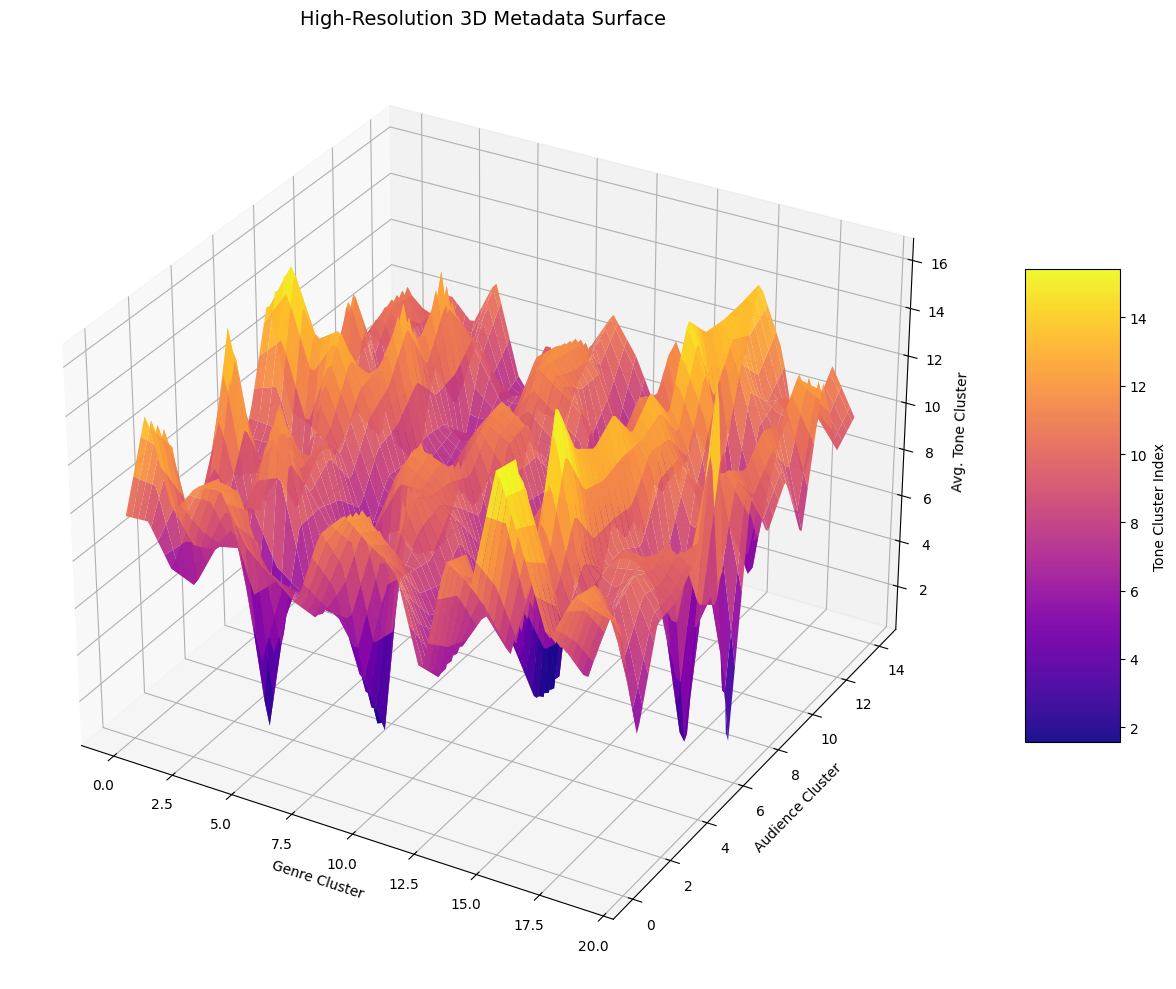

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("clustered_outputs/clustered_books_metadata.csv")

# Convert to integer indices
x = df['genre_cluster'].astype(int)
y = df['audience_cluster'].astype(int)
z = df['tone_cluster'].astype(int)

# Define grid size
x_bins = x.max() + 1
y_bins = y.max() + 1

# Initialize Z grid: avg tone per genre-audience pair
Z = np.zeros((x_bins, y_bins))
counts = np.zeros((x_bins, y_bins))

for i, j, k in zip(x, y, z):
    Z[i, j] += k
    counts[i, j] += 1

counts[counts == 0] = 1
Z = Z / counts

# Interpolation using RegularGridInterpolator
x_range = np.arange(x_bins)
y_range = np.arange(y_bins)
interp_func = RegularGridInterpolator((x_range, y_range), Z)


# Create a fine grid
x_new = np.linspace(0, x_bins - 1, 100)
y_new = np.linspace(0, y_bins - 1, 100)
X_highres, Y_highres = np.meshgrid(x_new, y_new)

# Evaluate interpolation
points = np.array([X_highres.ravel(), Y_highres.ravel()]).T
Z_highres = interp_func(points).reshape(X_highres.shape)

# Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_highres, Y_highres, Z_highres, cmap='plasma', edgecolor='none', alpha=0.95)

ax.set_title("High-Resolution 3D Metadata Surface", fontsize=14)
ax.set_xlabel("Genre Cluster")
ax.set_ylabel("Audience Cluster")
ax.set_zlabel("Avg. Tone Cluster")

fig.colorbar(surf, shrink=0.5, aspect=5, label="Tone Cluster Index")
plt.tight_layout()
plt.show()


C:\Users\a.khajooei\AppData\Local\Temp\ipykernel_20676\2562256782.py:29: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Arial.
  plt.tight_layout()
c:\Fedshi Assignment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


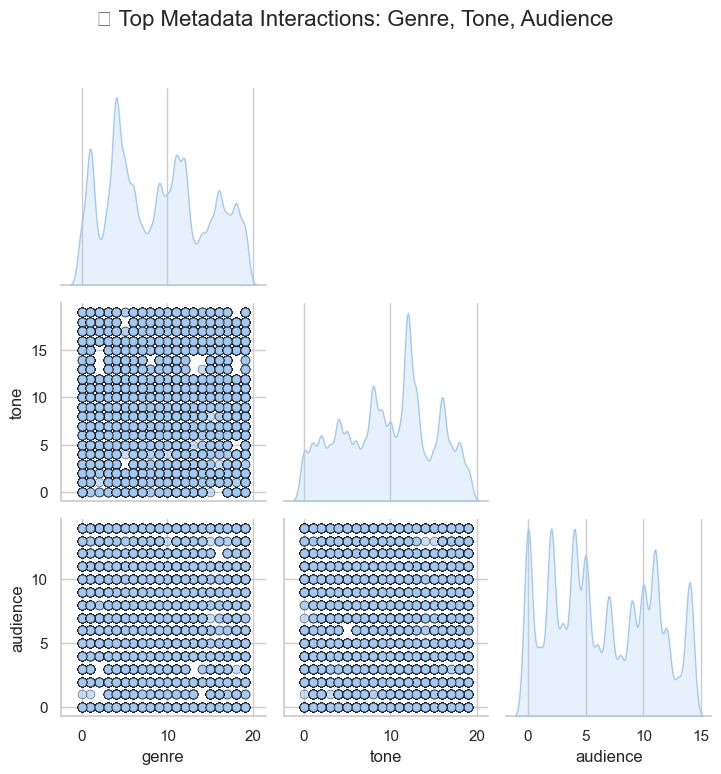

In [3]:
import csv

# Stream and clean the CSV file manually, only keeping necessary columns
file_path = 'final_normalized_metadata.csv'
columns_to_keep = ['genre', 'tone', 'audience']
cleaned_rows = []

with open(file_path, mode='r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        try:
            cleaned_row = {col: row[col] for col in columns_to_keep}
            if all(cleaned_row.values()):
                cleaned_rows.append(cleaned_row)
        except KeyError:
            continue  # Skip malformed rows

# Convert to DataFrame
clean_df = pd.DataFrame(cleaned_rows)
clean_df = clean_df.astype("category").apply(lambda x: x.cat.codes)

import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplot
sns.set(style="whitegrid", context="notebook", palette="pastel")
g = sns.pairplot(clean_df, diag_kind="kde", corner=True, plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"})
g.fig.suptitle("✨ Top Metadata Interactions: Genre, Tone, Audience", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()
